In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import to_categorical, plot_model
from keras.layers import Activation, Dense, SimpleRNN
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
num_labels = len(np.unique(y_train))

In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size])
x_test = np.reshape(x_test, [-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               72960     
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


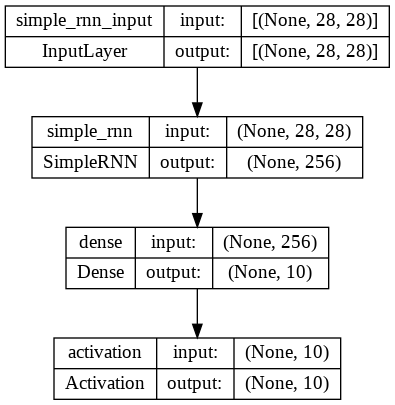

In [7]:
model = Sequential()
model.add(SimpleRNN(units=units, dropout=dropout, input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='rnn-mnist.png', show_shapes=True)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=20)

Epoch 1/20
469/469 [==============================] - 30s 60ms/step - loss: 0.7489 - accuracy: 0.7932
Epoch 2/20
469/469 [==============================] - 28s 59ms/step - loss: 0.3221 - accuracy: 0.9073
Epoch 3/20
469/469 [==============================] - 28s 59ms/step - loss: 0.2308 - accuracy: 0.9327
Epoch 4/20
469/469 [==============================] - 30s 64ms/step - loss: 0.1882 - accuracy: 0.9440
Epoch 5/20
469/469 [==============================] - 28s 59ms/step - loss: 0.1657 - accuracy: 0.9502
Epoch 6/20
469/469 [==============================] - 27s 58ms/step - loss: 0.1481 - accuracy: 0.9560
Epoch 7/20
469/469 [==============================] - 27s 59ms/step - loss: 0.1342 - accuracy: 0.9591
Epoch 8/20
469/469 [==============================] - 28s 59ms/step - loss: 0.1214 - accuracy: 0.9642
Epoch 9/20
469/469 [==============================] - 27s 58ms/step - loss: 0.1114 - accuracy: 0.9665
Epoch 10/20
469/469 [==============================] - 28s 59ms/step - loss: 0.105

In [10]:
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)

79/79 [==============================] - 3s 25ms/step - loss: 0.0894 - accuracy: 0.9707


In [11]:
print("Accuracy: ", (100 * acc), "%")

Accuracy:  97.07000255584717 %
